So we trained a model to classify the fashion mnist dataset now, a simple thing we could use is convolutional neural networks to train our model.

the benefit of using convolutional neural network is detecting the specific feature of images by convolving different filters.

In image processing field for capturing special element of an image we convolve filters i. e. some filters show the horizontal line and the other emphasize on vertical line. 

Now we want to create a model with Conv2d layers

after Convolving the image we use a pooling layer to reduce the feature of convolved image in order to make the feature more specific and delete unnecessary features.

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The input of and Conv2d layer is like (trials, x, y, num_channels) i. e. for gray scale photo we need to set num_channels = 1 and for RGB num_channel = 3

In [3]:
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_train = x_train / 255.0
x_test = np.reshape(x_test, (10000, 28, 28, 1))
x_test = x_test / 255.0

In [4]:
model = keras.Sequential([
                          keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                              activation=tf.nn.relu,
                                              input_shape=(28, 28, 1)),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                                              activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
                          
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 3ms/step - loss: 0.4384 - accuracy: 0.8413
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8921
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2498 - accuracy: 0.9079
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2174 - accuracy: 0.9192
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1889 - accuracy: 0.9296


In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.9099


[0.25117093324661255, 0.9099000096321106]

Now we by changing a little bit on our architectur, the improvement is significant so let's try some way to play with the accuracies.

1. Reduce the filter of Conv2D layer

Result : Reduce the acc

In [7]:
model = keras.Sequential([
                          keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
                                              activation=tf.nn.relu,
                                              input_shape=(28, 28, 1)),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                                              activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
                          
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

[0.29019516706466675, 0.8934000134468079]

2. Delete some Conv2D layers

Result : Improve the acc of model

In [8]:
model = keras.Sequential([
                          keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                              activation=tf.nn.relu,
                                              input_shape=(28, 28, 1)),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                        #   keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        #                       activation='relu'),
                        #   keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
                          
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3826 - accuracy: 0.8637
Epoch 2/5

[0.2508925795555115, 0.9138000011444092]

3. Delete all Conv2D layers except first one

Result : No effect on Accuracy

In [9]:
model = keras.Sequential([
                          keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                              activation=tf.nn.relu,
                                              input_shape=(28, 28, 1)),
                        #   keras.layers.MaxPool2D(pool_size=(2,2)),
                        #   keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        #                       activation='relu'),
                        #   keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
                          
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
flatten_3 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               5537920   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 5,539,850
Trainable params: 5,539,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3701 - accuracy: 0.8677
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2438 - accuracy: 0.9109
Epoch 3/5
1875/1875 [===================

[0.31608372926712036, 0.9027000069618225]

Now we want add a callback class to control our training.


In [10]:
class MyCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss')<0.4 :
            print('The model reach 60% accuract so the training stop.')
            self.model.stop_training = True

In [11]:
model = keras.Sequential([
                          keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                              activation=tf.nn.relu,
                                              input_shape=(28, 28, 1)),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                                              activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
                          
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = MyCallBack()

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4314 - accuracy: 0.8436
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2918 - accuracy: 0.8928
The model reach 60% accuract so the training stop.


For Visualizing the Output of layer we have some api of keras that we can use here:

In [12]:
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [13]:
for layer in model.layers:
    print(layer)

In [14]:
for layer in model.layers:
    print(layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 64), dtype=tf.float32, name=None), name='conv2d_6/Relu:0', description="created by layer 'conv2d_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 64), dtype=tf.float32, name=None), name='max_pooling2d_5/MaxPool:0', description="created by layer 'max_pooling2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 64), dtype=tf.float32, name=None), name='conv2d_7/Relu:0', description="created by layer 'conv2d_7'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 64), dtype=tf.float32, name=None), name='max_pooling2d_6/MaxPool:0', description="created by layer 'max_pooling2d_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1600), dtype=tf.float32, name=None), name='flatten_4/Reshape:0', description="created by layer 'flatten_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_8/Relu:0', description="created by layer 'dense_8'")
KerasTensor(type_spec=TensorSpec(shape=(No

In [15]:
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

In [17]:
print('Input : ', model.input)
layers_output = [layer.output for layer in model.layers]
print(models.Model(inputs=model.input, outputs=layers_output))

Input :  KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_6_input'), name='conv2d_6_input', description="created by layer 'conv2d_6_input'")


In [19]:
layers_output = [layer.output for layer in model.layers]
activations_model = models.Model(inputs=model.input, outputs=layers_output)

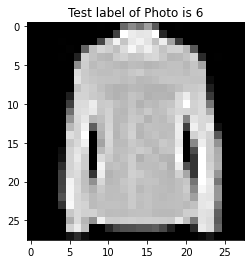

In [20]:
plt.imshow(x_test[26].reshape(28, -1), cmap='gray')
plt.title(f'Test label of Photo is {y_test[26]}')
plt.show()

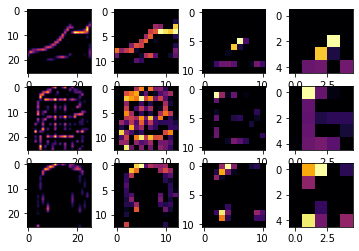

In [22]:
f, ax = plt.subplots(3, 4)
for i in range(0, 4):
    f1 = activations_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[i]
    ax[0, i].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[0, i].grid(False)
    f2 = activations_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[i]
    ax[1, i].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[1, i].grid(False)
    f3 = activations_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[i]
    ax[2, i].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[2, i].grid(False)




In [23]:
classification = model.predict(x_test)
np.printoptions(linewidth = 5)
print('Predict : ',np.argmax(classification[26]))
print('Class:', y_test[26])

Predict :  6
Class: 6
